# OkCupid: DATE A SCIENTIST


## A Machine Learning Portfolio Project by 4tolon

### Exercise and data provide by CodeAcademy

<img src='https://www.imer.mx/tropicalisima/wp-content/uploads/sites/19/Cientifico-Loco.jpg'  >

## Introduction

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

In this portfolio project, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.

You will also create a presentation about your findings from this OKCupid dataset.

The purpose of this project is to practice formulating questions and implementing machine learning techniques to answer those questions. However, the questions you ask and how you answer them are entirely up to you.

We’re excited to see the different topics you explore.

## Scoping

Goals – For this project I goin to create a meaningfull JupyterNoteBook in all the aspects of the propose problem from the Data threatment to the scorring of the Machine Learning Models

Actions – Analisis of data probided in many diferent ways, from simple tally to complex visualitation. After that, determine the problems to analice by the use of machine learning and validate the conclusions with data.

Data – Thee data for this exercise is a CSV file called profiles.csv

Analysis – The analysis will involve description, detection, prediction, or behavior change, but this will by determined after the study of the data provided. 

# Import the modules 

In [103]:
# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#Machine Learning Modules
from sklearn.model_selection import train_test_split

# Loading of Data

In [2]:
df = pd.read_csv('profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

As we see, there are 30 diferent columns with information form 59946 diferents users of the app. The most of the columns are catergorical

###  What numerical data are there?

In [4]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


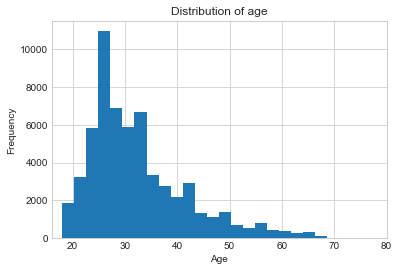

In [5]:
plt.hist(df['age'], bins=40)
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

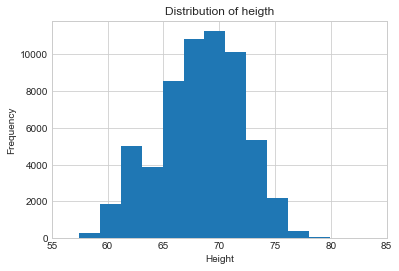

In [6]:
plt.hist(df['height'], bins= 50)
plt.title("Distribution of heigth")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.xlim(55, 85)
plt.show()

# What missing values are there?

In [7]:
df.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

## What data is null? The holes in our data frame


<img src='https://cde.peru.com//ima/0/1/1/4/4/1144784/611x458/agroscope.jpg'>

<AxesSubplot:>

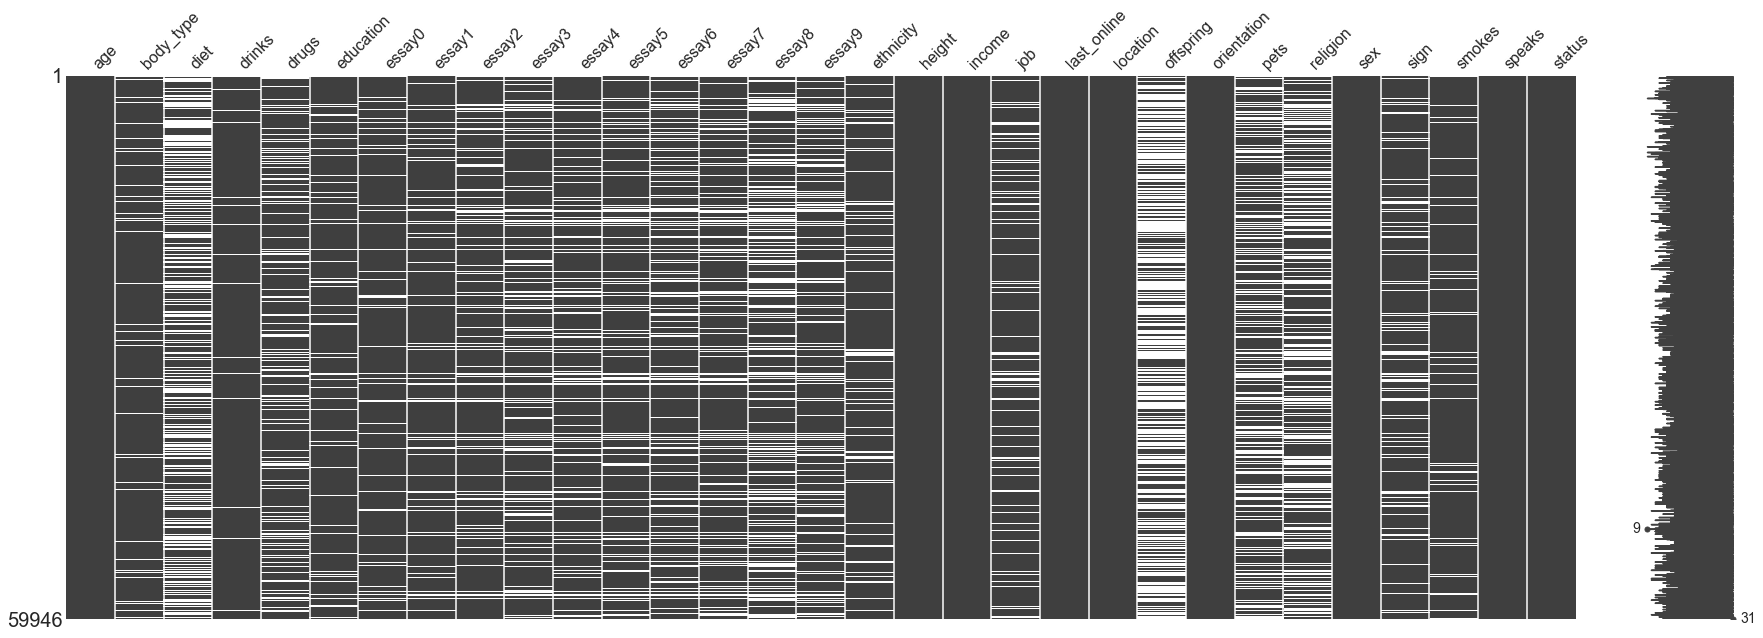

In [8]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

Analisys of the table shows that columns like age, body type, diet, drinks, drugs, height and sex may by interesting for analisys, so I will discart the others 

## Cleaning the data frame  

In [9]:
print(df.columns.values)

['age' 'body_type' 'diet' 'drinks' 'drugs' 'education' 'essay0' 'essay1'
 'essay2' 'essay3' 'essay4' 'essay5' 'essay6' 'essay7' 'essay8' 'essay9'
 'ethnicity' 'height' 'income' 'job' 'last_online' 'location' 'offspring'
 'orientation' 'pets' 'religion' 'sex' 'sign' 'smokes' 'speaks' 'status']


In [10]:
drop_this_columns = [
    'education',
    'ethnicity',
    'job',
    'last_online',
    'location',
    'offspring',
    'orientation',
    'pets',
    'religion',
    'sign',
    'speaks',
    'income', 
    'essay0',
    'essay1',
    'essay2',
    'essay3',
    'essay4',
    'essay5',
    'essay6',
    'essay7',
    'essay8',
    'essay9'
]

new_df = df.drop(drop_this_columns, axis=1)


In [11]:
print(new_df.columns.values)

['age' 'body_type' 'diet' 'drinks' 'drugs' 'height' 'sex' 'smokes'
 'status']


In [12]:
len(new_df)

59946

In [13]:
new_df.isna().any()

age          False
body_type     True
diet          True
drinks        True
drugs         True
height        True
sex          False
smokes        True
status       False
dtype: bool

In [14]:
new_df.dropna(subset=['body_type', 'diet', 'drinks', 'height', 'smokes','drugs'], inplace = True)

## How is our data frame now?

<img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Falchef.mx%2Fwp-content%2Fuploads%2F2020%2F09%2FCaptura-de-pantalla-2020-09-30-a-las-16.56.26.png&f=1&nofb=1'>


<AxesSubplot:>

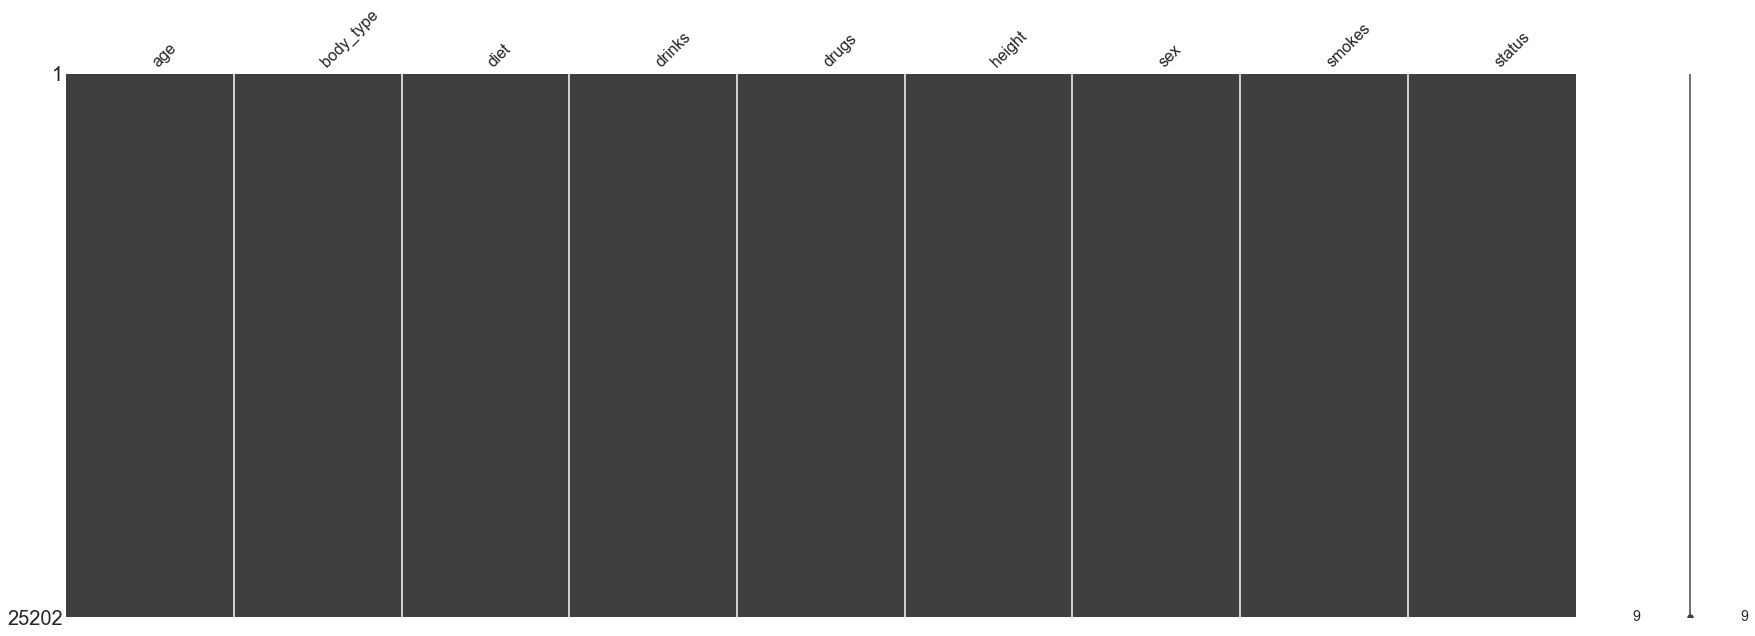

In [15]:
missingno.matrix(new_df, figsize = (30,10))

In [16]:
len(new_df)

25202

<img src='https://media.giphy.com/media/gRcSkaONpO4zm/giphy.gif' >

I think Drugs column must be the most interested because it has only three outputs. We always have been told that there is a closed realationship between drugs, smokes and alcohol so we will see.

## Study of the drugs column:

In [17]:
new_df['drugs'].head()

0         never
1     sometimes
7         never
9         never
11        never
Name: drugs, dtype: object

In [18]:
new_df['drugs'].value_counts()

never        20339
sometimes     4600
often          263
Name: drugs, dtype: int64

Plot to see the relationship between drugs and drinks with age:

First in DF global 

<AxesSubplot:xlabel='drugs', ylabel='age'>

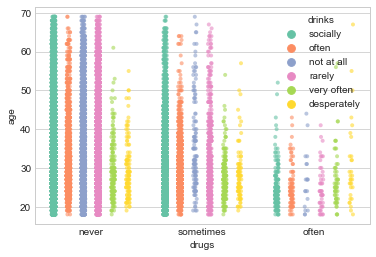

In [19]:
sns.stripplot(x="drugs",y="age",data=df,jitter=True,hue='drinks',palette='Set2',
              dodge=True, alpha=0.6, size=4)

Second in the NEW DF whithout gaps and only the columns selectec

<AxesSubplot:xlabel='drugs', ylabel='age'>

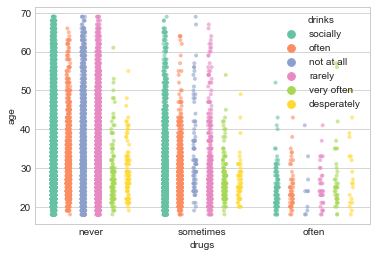

In [20]:
sns.stripplot(x="drugs",y="age",data=new_df,jitter=True,hue='drinks',palette='Set2',
              dodge=True, alpha=0.6, size=4)

They look similar, it's looks like the reduction will not afect our analisys 

Plot to see the relationship between drugs and smoke with age:

First in DF global 

<AxesSubplot:xlabel='drugs', ylabel='age'>

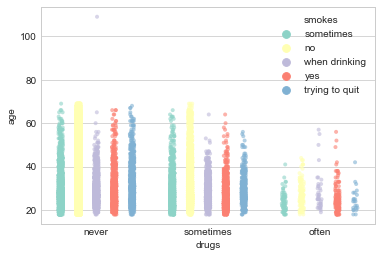

In [21]:
sns.stripplot(x="drugs",y="age",data=df,jitter=True,hue='smokes',palette='Set3',
              dodge=True, alpha=0.6, size=4)

Second in the NEW DF 

<AxesSubplot:xlabel='drugs', ylabel='age'>

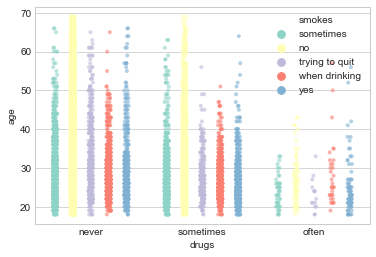

In [22]:
sns.stripplot(x="drugs",y="age",data=new_df,jitter=True,hue='smokes',palette='Set3',
              dodge=True, alpha=0.6, size=4)

There is a outlier in the fisrt data frame that makes the plot chage the scale, but in esencial they look the same.

## I consider with arround 25000 users it is a good start to implement and train some Machine Learning Models. Lets adapt the data left to our purpouse

<AxesSubplot:>

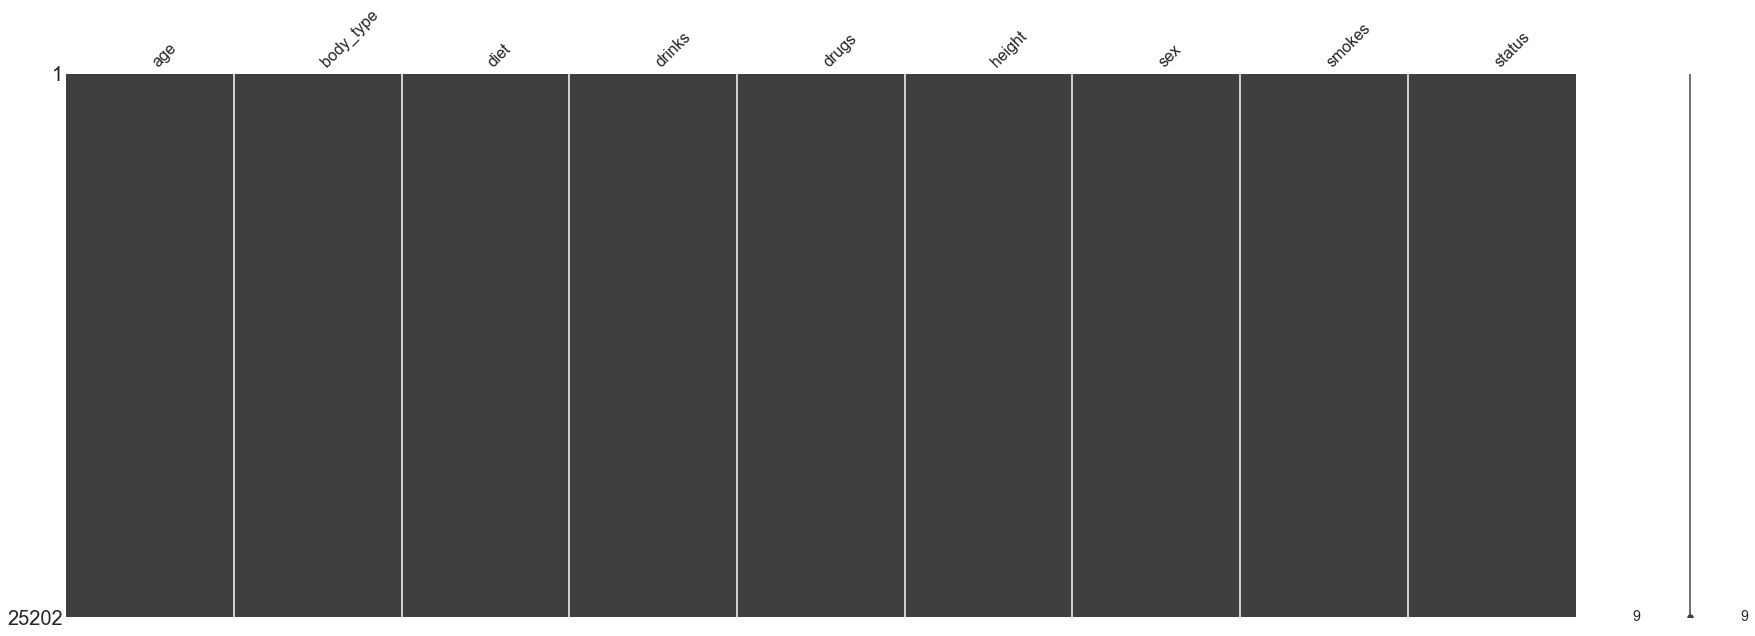

In [23]:
missingno.matrix(new_df, figsize = (30,10))

### Transforming string data in to numbers in every column:

Here's a **BODY** for you: <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Finst-0.cdn.shockers.de%2Fku_cdn%2Fout%2Fpictures%2Fmaster%2Fproduct%2F1%2Fhorrorshop_com-bodybuilder_kostuem_aufblasbar_fuer_maenner-lustige_faschingskostueme_online_kaufen-27046.jpg&f=1&nofb=1" width=200 height=200 />

In [24]:
new_df.body_type.value_counts()

average           6802
fit               5742
athletic          5366
thin              2191
curvy             1843
a little extra    1312
skinny             804
full figured       464
overweight         227
jacked             191
used up            182
rather not say      78
Name: body_type, dtype: int64

In [25]:
new_df['body_type'] = new_df['body_type'].map({'thin':0,'skinny':1,'fit':2,'athletic':3,
                                            'jacked':4,'rather not say':5,'average':6,
                                            'a little extra':7,'used up':8,'curvy':9,'overweight':10,
                                            'full figured':11})

In [26]:
new_df.body_type.value_counts()

6     6802
2     5742
3     5366
0     2191
9     1843
7     1312
1      804
11     464
10     227
4      191
8      182
5       78
Name: body_type, dtype: int64

We are what we eat. **DIET**: <img src="https://static01.nyt.com/images/2017/11/21/upshot/21up-healthdiet/21up-healthdiet-articleLarge.gif?quality=30&auto=webp" width=200 height=200 />

In [27]:
new_df.diet.value_counts()

mostly anything        12290
anything                4357
strictly anything       3341
mostly vegetarian       2322
mostly other             741
strictly vegetarian      632
vegetarian               366
strictly other           310
other                    233
mostly vegan             222
strictly vegan           160
vegan                     86
mostly kosher             64
mostly halal              36
strictly halal            15
strictly kosher           14
halal                      7
kosher                     6
Name: diet, dtype: int64

In [28]:
new_df['diet'] = new_df['diet'].map({'mostly anything':0, 'anything':1, 'strictly anything':2, 'mostly vegetarian':3, 
                                            'mostly other':4, 'strictly vegetarian':5, 'vegetarian':6,
                                            'strictly other':7, 'other':8, 'mostly vegan':9, 
                                     'strictly vegan':10, 'vegan':11, 'mostly kosher':12,
                                            'mostly halal':13, 'strictly halal':14, 'strictly kosher':15, 'kosher':16, 
                                            'halal':17})

In [29]:
new_df.diet.value_counts()

0     12290
1      4357
2      3341
3      2322
4       741
5       632
6       366
7       310
8       233
9       222
10      160
11       86
12       64
13       36
14       15
15       14
17        7
16        6
Name: diet, dtype: int64

Cheers!!
**DRINKS** <img src="https://healthblog.uofmhealth.org/sites/consumer/files/2016-12/UMH_C_HOLIDAYHEART%20(1).gif" width=200 height=200 />

In [30]:
new_df.drinks.value_counts()

socially       17929
rarely          2896
often           2162
not at all      1789
very often       264
desperately      162
Name: drinks, dtype: int64

In [31]:
new_df['drinks'] = new_df['drinks'].map({'not at all':0, 'rarely':1, 'socially':2, 'often':3, 'very often':4,
                                         'desperately':5})

In [32]:
new_df.drinks.value_counts()

2    17929
1     2896
3     2162
0     1789
4      264
5      162
Name: drinks, dtype: int64


**DRUGS** <img src="https://img.buzzfeed.com/buzzfeed-static/static/2015-12/8/6/enhanced/webdr12/anigif_enhanced-11963-1449573595-4.gif" width=200 height=200 />

In [33]:
new_df.drugs.value_counts()

never        20339
sometimes     4600
often          263
Name: drugs, dtype: int64

In [34]:
new_df['drugs'] = new_df['drugs'].map({'never':0, 'sometimes':1, 'often':2})

In [35]:
new_df.drugs.value_counts()

0    20339
1     4600
2      263
Name: drugs, dtype: int64

**SMOKE** <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fejuicemagazine.com%2Fwp-content%2Fuploads%2F2017%2F08%2Frihanna_vaping_ejuice_magazine_vape_supplies_article_smoke.gif&f=1&nofb=1" width=200 height=200 />

In [36]:
new_df.smokes.value_counts()

no                20402
sometimes          1688
when drinking      1429
yes                1032
trying to quit      651
Name: smokes, dtype: int64

In [37]:
new_df['smokes'] = new_df['smokes'].map({'no':0, 'sometimes':1, 'when drinking':2, 'trying to quit':3, 'yes':4})

In [38]:
new_df.smokes.value_counts()

0    20402
1     1688
2     1429
4     1032
3      651
Name: smokes, dtype: int64

**STATUS** <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftax-rules.com%2Fwp-content%2Fuploads%2F2019%2F01%2FMarital-Status-discrimination-1024x409.jpg&f=1&nofb=1" width=200 height=200 />

In [39]:
new_df.status.value_counts()

single            23725
available           695
seeing someone      668
married             111
unknown               3
Name: status, dtype: int64

In [40]:
new_df['status'] = new_df['status'].map({'single':0, 'available':1, 'seeing someone':2, 'married':3, 'unknown':4})

In [41]:
new_df.status.value_counts()

0    23725
1      695
2      668
3      111
4        3
Name: status, dtype: int64

**SEX** <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn.dribbble.com%2Fusers%2F1001007%2Fscreenshots%2F3551498%2Fgender.gif&f=1&nofb=1" width=200 height=200 />

In [42]:
new_df.sex.value_counts()

m    15140
f    10062
Name: sex, dtype: int64

In [43]:
new_df['sex'] = new_df['sex'].map({'m':0, 'f':1})

In [44]:
new_df.sex.value_counts()

0    15140
1    10062
Name: sex, dtype: int64

# Let's investigate posible relationships


6     6802
2     5742
3     5366
0     2191
9     1843
7     1312
1      804
11     464
10     227
4      191
8      182
5       78
dtype: int64


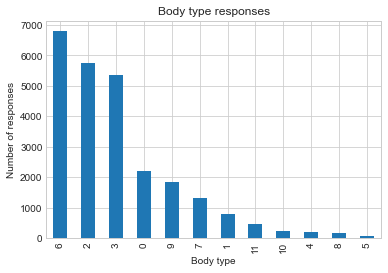

In [45]:
body_type_responses = pd.value_counts(new_df['body_type'].values, sort=True)
print(body_type_responses)
ax = body_type_responses.plot(kind='bar', title='Body type responses')
ax.set(xlabel='Body type', ylabel='Number of responses')
plt.show()

The most frecuent response was average (6), logicaly. But fit (2) and athletic(3) are second and third closest to the average. That made me suspicious about the honesty in that answer....
<img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia0.giphy.com%2Fmedia%2F4YWtPFasSBZMFrs7ML%2Fgiphy.gif&f=1&nofb=1'>
We will let that pass for now!

### A  good way to see relations that I found is  .corr

In [46]:
new_df.corr(method='kendall', min_periods=4)

,age,body_type,diet,drinks,drugs,height,sex,smokes,status
age,1.000000,0.005085,-0.008922,-0.074401,-0.150182,-0.023773,0.044331,-0.149191,-0.018188
body_type,0.005085,1.000000,-0.025152,-0.018140,-0.000912,-0.081403,0.123142,0.047809,0.025413
diet,-0.008922,-0.025152,1.000000,-0.037127,0.086428,-0.009001,0.046377,0.026076,0.060961
drinks,-0.074401,-0.018140,-0.037127,1.000000,0.208362,0.032163,-0.011925,0.158737,-0.000053
drugs,-0.150182,-0.000912,0.086428,0.208362,1.000000,0.065304,-0.057845,0.350472,0.108872
height,-0.023773,-0.081403,-0.009001,0.032163,0.065304,1.000000,-0.585746,0.045036,0.004174
sex,0.044331,0.123142,0.046377,-0.011925,-0.057845,-0.585746,1.000000,-0.046987,0.007168
smokes,-0.149191,0.047809,0.026076,0.158737,0.350472,0.045036,-0.046987,1.000000,0.024209
status,-0.018188,0.025413,0.060961,-0.000053,0.108872,0.004174,0.007168,0.024209,1.000000


This is as meaningfull chart to determine the relationships between variables.

The hightest value is the relationships of sex and height. In the next graph we can see the obious relation between this two contiunous variables.

<AxesSubplot:xlabel='age', ylabel='height'>

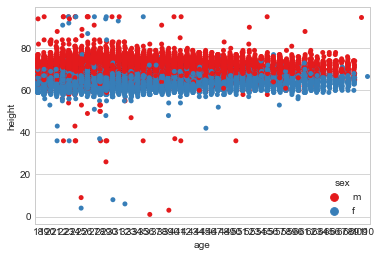

In [47]:

sns.stripplot(x="age",y="height",data=df,jitter=True,hue='sex',palette='Set1')

<AxesSubplot:xlabel='drugs', ylabel='smokes'>

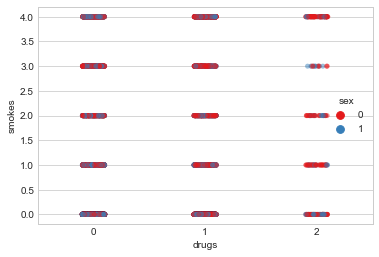

In [48]:
sns.stripplot(x="drugs",y="smokes",data=new_df,jitter=True,hue='sex',alpha=0.5 ,palette='Set1')

# Machine Learning Models Experiments

<img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimg.freepik.com%2Fvector-gratis%2Fpasarela-desfile-moda-dibujada-mano-ilustrada_23-2148831545.jpg%3Fsize%3D626%26ext%3Djpg&f=1&nofb=1'>


## First we preprocess the data and we made the division of the data frame in Train and Test

In [49]:
#Standardize and preprocess the column numbers for the models:

train_data_drugs,test_data_drugs, train_labels_drugs, test_labels_drugs = train_test_split(new_df[['age','drinks','smokes', 'body_type', 'diet', 'status', 'sex']],
                                                                   new_df['drugs'],test_size = 0.2, random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler_drugs = StandardScaler()
train_features_drugs = scaler_drugs.fit_transform(train_data_drugs)
test_features_drugs = scaler_drugs.transform(test_data_drugs)

I want to know who long takes each model

In [180]:
# import time
from time import time

### First aproximation
Simple linear Regresion - Ordinary Least Squares

In [69]:
from sklearn import linear_model

#Standardized
start = time()
model_drugs_slr_s= linear_model.LinearRegression()
model_drugs_slr_s.fit(train_features_drugs,train_labels_drugs)
done = time()
sc_lr_s = model_drugs_slr_s.score(test_features_drugs, test_labels_drugs)
t_lr_s = done - start

In [70]:
#Not Standardize
start = time()
model_drugs_slr_ns = linear_model.LinearRegression()
model_drugs_slr_ns.fit(train_data_drugs,train_labels_drugs)
done = time()
sc_lr_ns = model_drugs_slr_ns.score(test_data_drugs, test_labels_drugs)
t_lr_ns = done - start


In [71]:
print('Model score - ', 'Linear Regerssion - Standaririze data:', sc_lr_s)
print('Time took', t_lr_s, 'seconds')
print('______________________________')
print('Model score - ', 'Linear Regerssion - not standarize data:', sc_lr_ns)
print('Time took', t_lr_ns, 'seconds')

Model score -  Linear Regerssion - Standaririze data: 0.183579569995589
Time took 0.006007194519042969 seconds
______________________________
Model score -  Linear Regerssion - not standarize data: 0.1835795699955889
Time took 0.007992744445800781 seconds


It's a horrible result 🤢, we are not in a regression problem, we are in a classification problem so let's try some clasification algorithms 

## To the correct models

Let's try the Ridge Classifier

https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier

In [181]:
#Standardized
start = time()
model_drugs_RC_s = linear_model.RidgeClassifier()
model_drugs_RC_s.fit(train_features_drugs,train_labels_drugs)
done = time()
sc_RC_s = model_drugs_RC_s.score(test_features_drugs, test_labels_drugs)
t_RC_s = done - start

In [182]:
#Not Standardized
start = time()
model_drugs_RC_ns = linear_model.RidgeClassifier()
model_drugs_RC_ns.fit(train_data_drugs,train_labels_drugs)
done = time()
sc_RC_ns = model_drugs_RC_ns.score(test_data_drugs, test_labels_drugs)
t_RC_ns = done - start

In [225]:
# Shows frist results
print('Model score - ', 'Linear Regerssion - Standaririze data:', sc_RC_s,'. Time took', t_RC_s, 'seconds')
print('------------------------------------------------------------------------------------------------------------------')
print('Model score - ', 'Linear Regerssion - not standarize data:', sc_RC_ns,'. Time took', t_RC_ns, 'seconds')


Model score -  Linear Regerssion - Standaririze data: 0.8123388216623686 . Time took 1.9758973121643066 seconds
------------------------------------------------------------------------------------------------------------------
Model score -  Linear Regerssion - not standarize data: 0.8123388216623686 . Time took 0.021001100540161133 seconds


In [227]:
coefficients_RC_s = model_drugs_RC_s.coef_
coefficients_RC_ns = model_drugs_RC_ns.coef_
coeflist_RC_s = coefficients_RC_s.tolist()[0]
coeflist_RC_ns = coefficients_RC_ns.tolist()[0]
RC_coef = [coeflist_RC_s, coeflist_RC_ns]

df_RC = DataFrame(RC_coef)
df_RC.columns = ['age','drinks','smokes', 'body_type', 'diet', 'status', 'sex']
df_RC['Time to calc'] = [t_RC_s, t_RC_ns]
df_RC['Type of data'] = ['Standarized', 'Not standarized']
df_RC['model'] = 'Ridge Classifier'
df_RC

,age,drinks,smokes,body_type,diet,status,sex,Time to calc,Type of data,model
0,0.075927,-0.129465,-0.217464,0.004675,-0.064851,-0.059686,0.034890,1.975897,Standarized,Ridge Classifier
1,0.007717,-0.170760,-0.217794,0.001707,-0.029454,-0.146174,0.071263,0.021001,Not standarized,Ridge Classifier


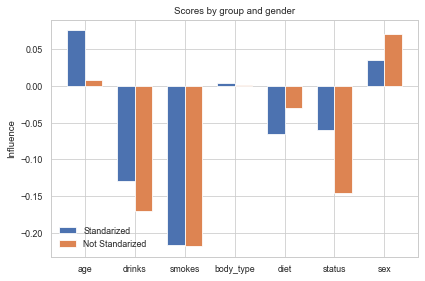

In [219]:
# create plot
labels = ['age','drinks','smokes', 'body_type', 'diet', 'status', 'sex']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, coeflist_RC_s, width, label='Standarized')
rects2 = ax.bar(x + width/2, coeflist_RC_ns, width, label='Not Standarized')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Influence')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Logistic Regerssion

Logistic Regression

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [234]:
from sklearn.linear_model import LogisticRegression

#Standardized
start = time()
model_drugs_LR_s = LogisticRegression()
model_drugs_LR_s.fit(train_features_drugs,train_labels_drugs)
done = time()
sc_LR_s = model_drugs_LR_s.score(test_features_drugs, test_labels_drugs)
t_LR_s = done - start

In [235]:
#Not Standardized
start = time()
model_drugs_LR_ns = LogisticRegression()
model_drugs_LR_ns.fit(train_data_drugs,train_labels_drugs)
done = time()
sc_LR_ns = model_drugs_LR_s.score(test_data_drugs, test_labels_drugs)
t_LR_ns =  done - start

C:\Users\Fer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [237]:
# Shows frist results
print('Model score - ', 'Logistic Regerssion - Standaririze data:', sc_LR_s,'. Time took', t_LR_s, 'seconds')
print('------------------------------------------------------------------------------------------------------------------')
print('Model score - ', 'Logisrtic Regerssion - not standarize data:', sc_LR_ns,'. Time took', t_LR_ns, 'seconds')


Model score -  Logistic Regerssion - Standaririze data: 0.814719301725848 . Time took 0.23597288131713867 seconds
------------------------------------------------------------------------------------------------------------------
Model score -  Logisrtic Regerssion - not standarize data: 0.8026185280698274 . Time took 0.718008279800415 seconds


In [238]:
coefficients_LR_s = model_drugs_LR_s.coef_
coefficients_LR_ns = model_drugs_LR_ns.coef_
coeflist_LR_s = coefficients_LR_s.tolist()[0]
coeflist_LR_ns = coefficients_LR_ns.tolist()[0]
LR_coef = [coeflist_LR_s, coeflist_LR_ns]

df_LR = DataFrame(LR_coef)
df_LR.columns = ['age','drinks','smokes', 'body_type', 'diet', 'status', 'sex']
df_LR['Time to calc'] = [t_LR_s, t_LR_ns]
df_LR['Type of data'] = ['Standarized', 'Not standarized']
df_LR['model'] = 'Ridge Classifier'
df_LR

,age,drinks,smokes,body_type,diet,status,sex,Time to calc,Type of data,model
0,0.474768,-0.393872,-0.453313,-0.011208,-0.202003,-0.119496,0.141284,0.235973,Standarized,Ridge Classifier
1,0.078424,-0.472384,-0.431801,0.009190,-0.087249,-0.256519,0.228539,0.718008,Not standarized,Ridge Classifier


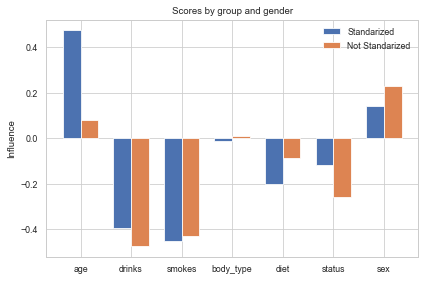

In [239]:
# create plot
labels = ['age','drinks','smokes', 'body_type', 'diet', 'status', 'sex']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, coeflist_LR_s, width, label='Standarized')
rects2 = ax.bar(x + width/2, coeflist_LR_ns, width, label='Not Standarized')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Influence')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

Logistic Regression CV

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html?highlight=logisticregressioncv#sklearn.linear_model.LogisticRegressionCVz

Not Standardized

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html?highlight=logisticregressioncv#

In [244]:
#Standardized
start = time()
from sklearn.linear_model import LogisticRegressionCV
model_drugs_LRCV_s = LogisticRegressionCV()
model_drugs_LRCV_s.fit(train_features_drugs,train_labels_drugs)
done = time()

sc_LRCV_s = model_drugs_LRCV_s.score(test_features_drugs, test_labels_drugs)
t_LRCV_s = done - start

In [245]:
#Not Standardized
start = time()
from sklearn.linear_model import LogisticRegressionCV
model_drugs_LRCV_ns = LogisticRegressionCV()
model_drugs_LRCV_ns.fit(train_data_drugs,train_labels_drugs)
done = time()


sc_LRCV_ns = model_drugs_LRCV_ns.score(test_data_drugs, test_labels_drugs)
t_LRCV_ns = done -start

C:\Users\Fer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Fer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

In [246]:
# Shows frist results
print('Model score - ', 'Logistic Regerssion CV - Standaririze data:', sc_LRCV_s,'. Time took', t_LRCV_s, 'seconds')
print('------------------------------------------------------------------------------------------------------------------')
print('Model score - ', 'Logisrtic Regerssion CV- not standarize data:', sc_LRCV_ns,'. Time took', t_LRCV_ns, 'seconds')

Model score -  Logistic Regerssion CV - Standaririze data: 0.8149176750644713 . Time took 4.056305885314941 seconds
------------------------------------------------------------------------------------------------------------------
Model score -  Logisrtic Regerssion CV- not standarize data: 0.814719301725848 . Time took 21.400120973587036 seconds


In [247]:
coefficients_LRCV_s = model_drugs_LRCV_s.coef_
coefficients_LRCV_ns = model_drugs_LRCV_ns.coef_
coeflist_LRCV_s = coefficients_LRCV_s.tolist()[0]
coeflist_LRCV_ns = coefficients_LRCV_ns.tolist()[0]
LRCV_coef = [coeflist_LRCV_s, coeflist_LRCV_ns]

df_LRCV = DataFrame(LRCV_coef)
df_LRCV.columns = ['age','drinks','smokes', 'body_type', 'diet', 'status', 'sex']
df_LRCV['Time to calc'] = [t_LRCV_s, t_LRCV_ns]
df_LRCV['Type of data'] = ['Standarized', 'Not standarized']
df_LRCV['model'] = 'Ridge Classifier'
df_LRCV

,age,drinks,smokes,body_type,diet,status,sex,Time to calc,Type of data,model
0,0.294335,-0.349956,-0.425738,-0.002123,-0.175899,-0.105707,0.102314,4.056306,Standarized,Ridge Classifier
1,0.049548,-0.518914,-0.453495,-0.003546,-0.091539,-0.291155,0.287589,21.400121,Not standarized,Ridge Classifier


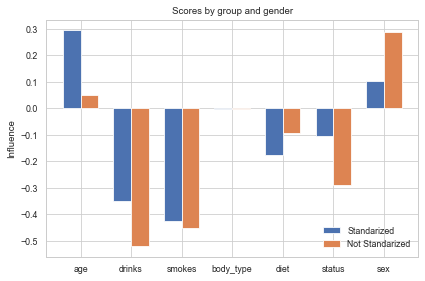

In [248]:
# create plot
labels = ['age','drinks','smokes', 'body_type', 'diet', 'status', 'sex']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, coeflist_LRCV_s, width, label='Standarized')
rects2 = ax.bar(x + width/2, coeflist_LRCV_ns, width, label='Not Standarized')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Influence')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

Perceptron

https://scikit-learn.org/stable/modules/linear_model.html#perceptron

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

Standardized

In [63]:
start = time()
from sklearn.linear_model import Perceptron
model_drugs_P_s = Perceptron()
model_drugs_P_s.fit(train_features_drugs,train_labels_drugs)
done = time()
print(model_drugs_P_s.score(test_features_drugs, test_labels_drugs))

0.7097798055941281


Not Standardized

In [64]:
start = time()
from sklearn.linear_model import Perceptron
model_drugs_P_ns = Perceptron()
model_drugs_P_ns.fit(train_data_drugs,train_labels_drugs)
done = time()
print(model_drugs_P_s.score(test_data_drugs, test_labels_drugs))

0.18766117833763143


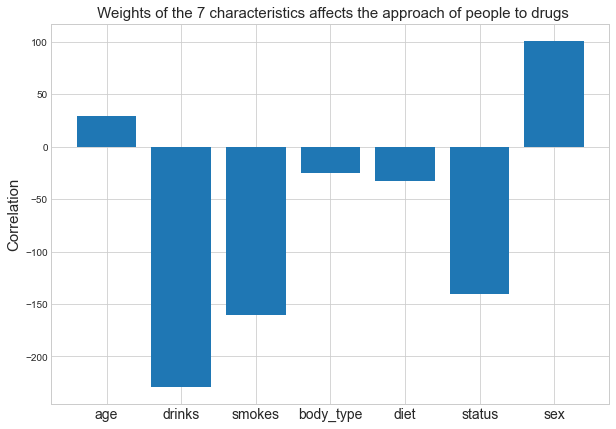

In [65]:
coefficients_P_ns = model_drugs_P_ns.coef_
coeflist_P_ns = coefficients_P_ns.tolist()[0]

from matplotlib import pyplot as plt
plt.figure(figsize = (10,7))
ax = plt.subplot()
plt.bar(range(len(coeflist_P_ns)), coeflist_P_ns)
ax.set_xticks(range(len(coeflist_P_ns)));
ax.set_xticklabels(['age','drinks','smokes', 'body_type', 'diet', 'status', 'sex'], size = 14)
plt.ylabel("Correlation", size = 15)
plt.title(" Weights of the 7 characteristics affects the approach of people to drugs", size = 15)
plt.show()

PasiveAggressiveClassifier

Standarized

In [66]:
start = time()
from sklearn.linear_model import PassiveAggressiveClassifier
model_drugs_pac_s = PassiveAggressiveClassifier(loss='hinge')
model_drugs_pac_s.fit(train_features_drugs,train_labels_drugs)
done = time()
print(model_drugs_pac_s.score(test_features_drugs, test_labels_drugs))


0.7925014878000397


Not Standarized

In [67]:

from sklearn.linear_model import PassiveAggressiveClassifier
start = time()
model_drugs_pac_ns = PassiveAggressiveClassifier(loss='hinge')
model_drugs_pac_ns.fit(train_data_drugs,train_labels_drugs)
done = time()
print(model_drugs_pac_ns.score(test_data_drugs, test_labels_drugs))


0.7800039674667725


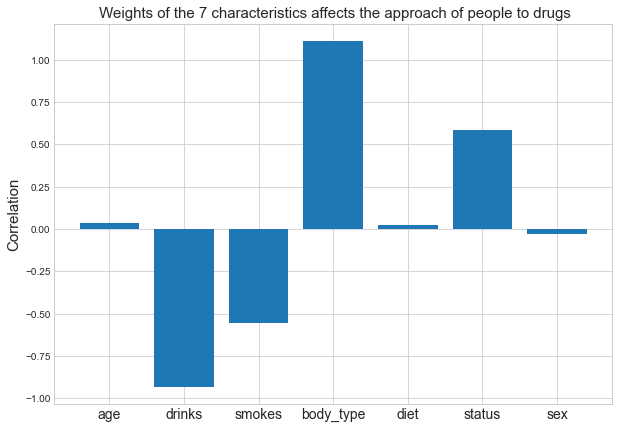

In [68]:
coefficients_pac_s = model_drugs_pac_s.coef_
coeflist_pac_s = coefficients_pac_s.tolist()[0]

from matplotlib import pyplot as plt
plt.figure(figsize = (10,7))
ax = plt.subplot()
plt.bar(range(len(coeflist_pac_s)), coeflist_pac_s)
ax.set_xticks(range(len(coeflist_pac_s)));
ax.set_xticklabels(['age','drinks','smokes', 'body_type', 'diet', 'status', 'sex'], size = 14)
plt.ylabel("Correlation", size = 15)
plt.title(" Weights of the 7 characteristics affects the approach of people to drugs", size = 15)
plt.show()

Linear and Quadratic Discriminant Analysis

https://scikit-learn.org/stable/modules/lda_qda.html#linear-and-quadratic-discriminant-analysis

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis


In [69]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
start = time()
model_drugs_lda_s = LinearDiscriminantAnalysis()
model_drugs_lda_s.fit(train_features_drugs,train_labels_drugs)
done = time()
print(model_drugs_lda_s.score(test_features_drugs, test_labels_drugs))

0.8091648482443959


In [70]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
start = time()
model_drugs_lda_ns = LinearDiscriminantAnalysis()
model_drugs_lda_ns.fit(train_data_drugs,train_labels_drugs)
done = time()
print(model_drugs_lda_ns.score(test_data_drugs, test_labels_drugs))

0.8091648482443959


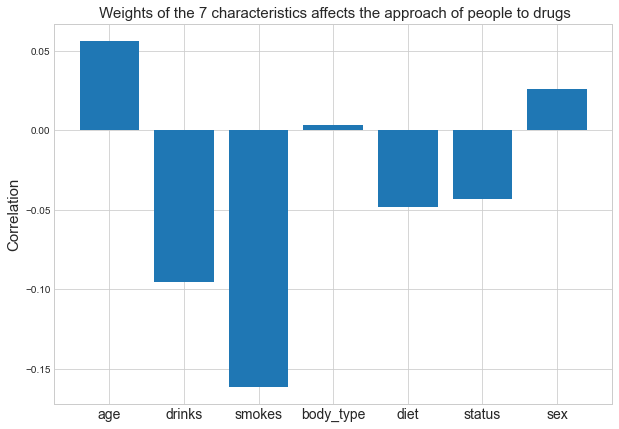

In [71]:
coefficients_lda_s = model_drugs_lda_s.coef_
coeflist_lda_s = coefficients_lda_s.tolist()[0]

from matplotlib import pyplot as plt
plt.figure(figsize = (10,7))
ax = plt.subplot()
plt.bar(range(len(coeflist_lda_s)), coeflist_lda_s)
ax.set_xticks(range(len(coeflist_lda_s)));
ax.set_xticklabels(['age','drinks','smokes', 'body_type', 'diet', 'status', 'sex'], size = 14)
plt.ylabel("Correlation", size = 15)
plt.title(" Weights of the 7 characteristics affects the approach of people to drugs", size = 15)
plt.show()

In [72]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
start = time()
model_drugs_qda_s = QuadraticDiscriminantAnalysis()
model_drugs_qda_s.fit(train_features_drugs,train_labels_drugs)
done = time()
print(model_drugs_qda_s.score(test_features_drugs, test_labels_drugs))

0.7875421543344574


In [73]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
start = time()
model_drugs_qda_ns = QuadraticDiscriminantAnalysis()
model_drugs_qda_ns.fit(train_data_drugs,train_labels_drugs)
done = time()
print(model_drugs_qda_ns.score(test_data_drugs, test_labels_drugs))

0.7875421543344574


Suport Vector Machines

https://scikit-learn.org/stable/modules/svm.html



In [74]:

from sklearn import svm
start = time()
model_drugs_svm_s = svm.SVC()
model_drugs_svm_s.fit(train_features_drugs,train_labels_drugs)
done = time()
print(model_drugs_svm_s.score(test_features_drugs, test_labels_drugs))

0.8198770085300535


In [75]:

from sklearn import svm
start = time()
model_drugs_svm_ns = svm.SVC()
model_drugs_svm_ns.fit(train_data_drugs,train_labels_drugs)
print(model_drugs_svm_ns.score(test_data_drugs, test_labels_drugs))

0.8026185280698274


In [76]:

from sklearn import tree
start = time()
model_drugs_t_s = tree.DecisionTreeClassifier()
model_drugs_t_s.fit(train_features_drugs,train_labels_drugs)
print(model_drugs_t_s.score(test_features_drugs, test_labels_drugs))

0.7841698075778616


In [77]:

from sklearn import tree
start = time()
model_drugs_t_ns = tree.DecisionTreeClassifier()
model_drugs_t_ns.fit(train_data_drugs,train_labels_drugs)
print(model_drugs_t_ns.score(test_data_drugs, test_labels_drugs))

0.7863519143027177


In [79]:
from sklearn.linear_model import SGDClassifier
start = time()
model_drugs = SGDClassifier(loss="hinge", penalty="l2", max_iter=50)
model_drugs.fit(train_features_drugs,train_labels_drugs)
done = time()
print(model_drugs.score(test_features_drugs, test_labels_drugs))



0.8034120214243206


In [80]:
n_neighbors = 15

from sklearn import neighbors
start = time()
model_drugs = neighbors.KNeighborsClassifier(n_neighbors)
model_drugs.fit(train_features_drugs,train_labels_drugs)
done = time()

print(model_drugs.score(test_features_drugs, test_labels_drugs))


0.8212656219004166


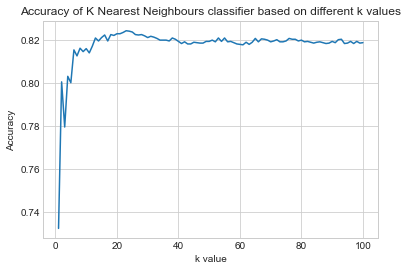

{'k': 23, 'score': 0.8244395953183892}


In [81]:
# generate plot showing K Nearest Neighbors classifier score based on different n_neighbors values 
# and print out n_neighbors value that results in highest score

scores = []

highest_score = {
    'k': 0,
    'score': 0
}

for k in range(1, 101):
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_features_drugs,train_labels_drugs)
    score = classifier.score(test_features_drugs, test_labels_drugs)
    scores.append(score)
    if score > highest_score['score']:
        highest_score = {
            'k': k,
            'score': score
        }

x_values = range(1, 101)

y_values = scores

plt.plot(x_values, y_values)
plt.title('Accuracy of K Nearest Neighbours classifier based on different k values')
plt.ylabel('Accuracy')
plt.xlabel('k value')
plt.show()
print(highest_score)

In [82]:
from sklearn.neural_network import MLPClassifier
start = time()
model_drugs = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(7, 3), random_state=1)
model_drugs.fit(train_features_drugs,train_labels_drugs)
done = time()
print(model_drugs.score(test_features_drugs, test_labels_drugs))


0.8224558619321564


C:\Users\Fer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
tdf 